In [1]:
from pathlib import Path
import networkx as nx
import itertools
import matplotlib.pyplot as plt 

In [2]:
# ファイル読み込み
data_path = Path("./data/work_4.csv")
edge_list: list[tuple[int, int]] = []
max_index: int = 0 
with open(data_path, "r") as f: 
    while True: 
        s = f.readline() 
        if s == "": 
            break 
        fr, to = map(int, s.split(" "))
        edge_list.append((fr, to))
        max_index = max(max_index, fr, to)

# index毎に辺を管理する
# 小から大のみ管理する
edge_graph = [set() for _ in range(max_index + 1)]
for fr, to in edge_list: 
    mi = min(fr, to)
    ma = max(fr, to)
    edge_graph[mi].add(ma)

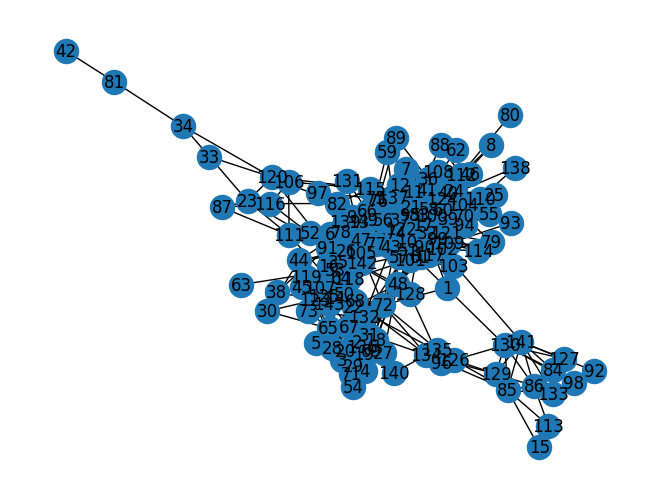

In [3]:
# 何もしない方を可視化
G = nx.Graph()
G.add_edges_from(edge_list)
nx.draw(G, with_labels=True)
plt.show()

[1, 7, 8, 10, 11, 12, 17, 21, 24, 25, 32, 36, 37, 39, 40, 41, 48, 55, 56, 57, 58, 59, 60, 70, 74, 75, 79, 83, 89, 90, 94, 97, 99, 102, 104, 110, 114, 121, 122, 124, 137, 138]
[5, 14, 16, 22, 35, 43, 45, 46, 50, 52, 53, 61, 62, 63, 64, 68, 72, 73, 76, 77, 80, 88, 93, 95, 100, 101, 103, 105, 107, 108, 109, 112, 117, 118, 119, 123, 125, 142, 143]
[6, 9, 13, 23, 26, 30, 33, 34, 38, 42, 44, 47, 49, 51, 66, 78, 81, 82, 87, 91, 106, 111, 115, 116, 120, 131, 139]
[15, 84, 85, 86, 92, 96, 98, 113, 126, 127, 128, 129, 130, 133, 134, 135, 140, 141]
[2, 3, 4, 18, 19, 20, 27, 28, 29, 31, 54, 65, 67, 69, 71, 132, 136]


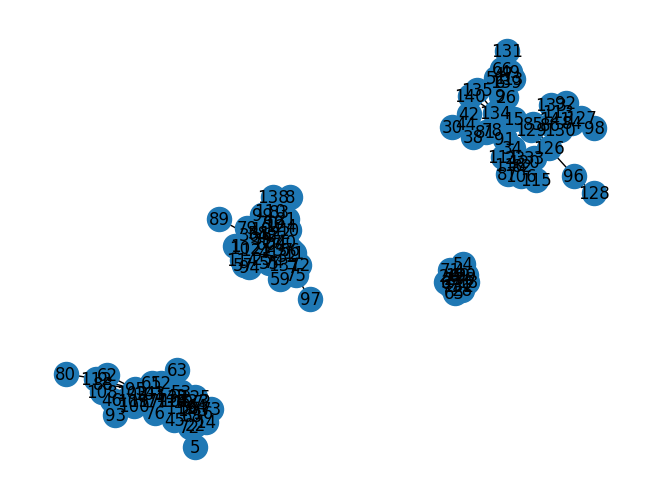

In [4]:
# girvan_newmanで分割
comp = nx.community.greedy_modularity_communities(G)
after_edge_list: list[tuple[int, int]] = []
for c in comp: 
    cluster: list[int] = sorted(c)
    print(cluster)
    
    # 分割後に同じコミュニティに属しているものだけ、辺を張る
    for i in range(len(cluster)): 
        for j in range(i + 1, len(cluster)): 
            x, y = cluster[i], cluster[j]
            if y in edge_graph[x]: 
                after_edge_list.append((x, y))

# 分割後も可視化
after_G = nx.Graph()
after_G.add_edges_from(after_edge_list)
nx.draw(after_G, with_labels=True)
plt.show()

In [5]:
print(len(edge_list))
print(len(after_edge_list))

623
470
